In [1]:
# https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

'/Users/elijah/Oddball_MLE'

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

df = pd.read_csv('CC GENERAL.csv')

In [42]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [43]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [44]:
df = df.drop(columns=['CUST_ID'])

In [45]:
df['PURCHASES_PER_MONTH'] = df['PURCHASES'] / df['TENURE']
df['CASH_ADVANCE_PER_MONTH'] = df['CASH_ADVANCE'] / df['TENURE']

df['ONEOFF_RATIO'] = np.where(df['PURCHASES'] == 0, np.nan, df['ONEOFF_PURCHASES'] / df['PURCHASES'])
df['INSTALLMENT_RATIO'] = np.where(df['PURCHASES'] == 0, np.nan, df['INSTALLMENTS_PURCHASES'] / df['PURCHASES'])
df['PAYMENT_RATIO'] = np.where(df['PURCHASES'] == 0, np.nan, df['PAYMENTS'] / df['PURCHASES'])
df['CASHADV_CREDITLIMIT_RATIO'] = np.where(df['CREDIT_LIMIT'] == 0, np.nan, df['CASH_ADVANCE'] / df['CREDIT_LIMIT'])

In [46]:
df.fillna(0, inplace=True)

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [48]:
inertia = []
sil_scores = []
K_range = range(2, 11)

In [49]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

Text(0, 0.5, 'Inertia')

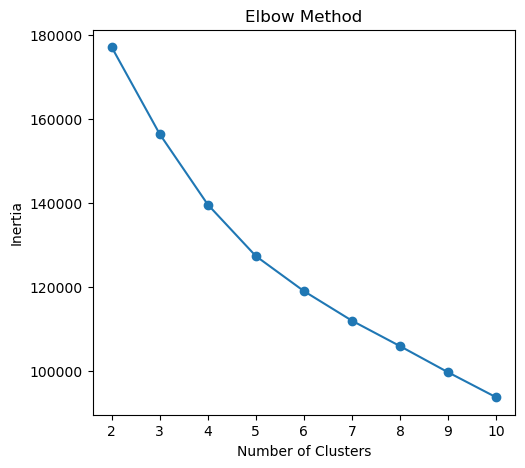

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

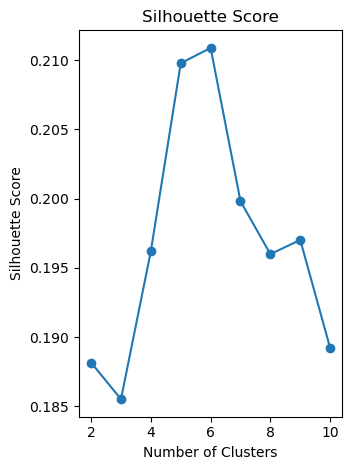

In [51]:
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [52]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans_final.fit_predict(X_scaled)


In [53]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

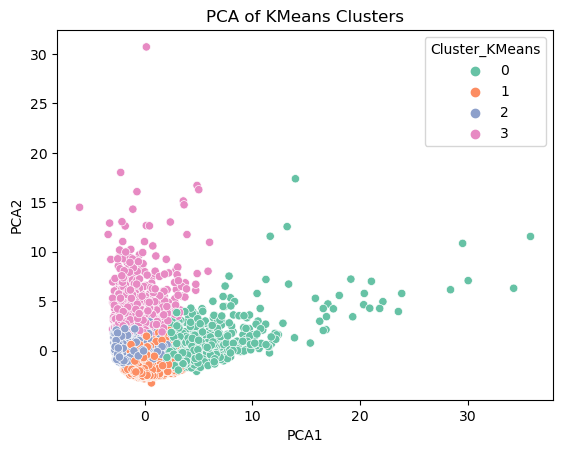

In [54]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set2')
plt.title('PCA of KMeans Clusters')
plt.show()

In [55]:
centroids_scaled = kmeans_final.cluster_centers_
centroids_orig = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_orig, columns=df.columns[:-3])  # exclude cluster/PCA cols
print(centroids_df)

       BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES   
0  2488.364515           0.981360  5079.146265       3426.471621  \
1   708.692841           0.854510   735.480282        152.333814   
2  1233.683524           0.849859   390.571675        359.420292   
3  4576.198974           0.955512   486.332689        308.830220   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0             1653.331818    453.394030             0.943015  \
1              583.627406    189.853687             0.756125   
2               31.278517    638.282596             0.216980   
3              177.566536   5088.281903             0.275057   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    0.741189                          0.718519  \
1                    0.091107                          0.700725   
2                    0.184993                          0.048053   
3                    0.135768                          0.175867   

  